# 1-1. 시계열 데이터 사례분석1 : Daily Minimum Temperatures in Melbourne
## (1) 시계열(Time Series) 생성

In [1]:
# Daily Minimum Temperatures in Melbourne로 다루어보는 시계열 데이터
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

print('슝=3')

슝=3


In [2]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/daily-min-temperatures.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))    # DataFrame으로 변환
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
# 이번에는 Date를 index_col로 지정해 주었습니다. (위의 DataFrame에서 (Date 컬럼을 index로 삼아 시계열 생성)
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [4]:
ts1 = df['Temp']  # 우선은 데이터 확인용이니 time series 의 이니셜을 따서 'ts'라고 이름 붙여줍시다!
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

판다스에서 제공하는 자료구조 중, 가로축과 세로축이 있는 2차원 데이터를 저장하는, DataFrame인 df와 1차원 데이터를 저장하는, Series인 df['Temp']는 index 구조가 동일하므로 Numpy, Pandas, Matplotlib 등 많은 라이브러리들이 호환해서 지원해줌. 하지만 그렇지 않은 경우도 간혹 발생하므로 여기서는 명확하게 Series 객체를 가지고 진행하는 걸로!

## (2) 시계열 안정성의 정성적 분석
이제 시계열이 준비되었으므로
시각화를 통해
안정성(Stationarity) 여부를 확인해보자.

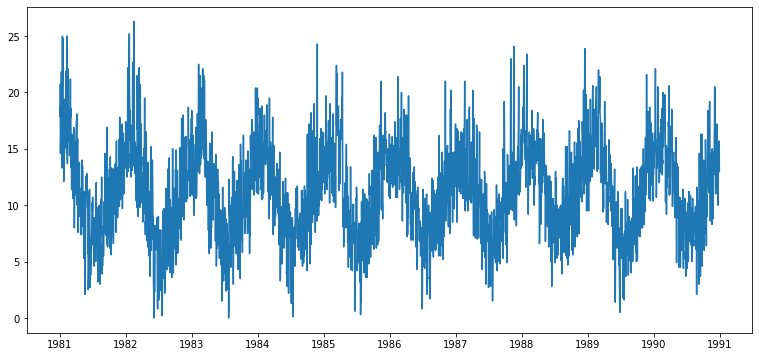

In [5]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

In [6]:
# 분석에 들어가기 전, 결측치 확인을 잊지 말자!
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Temp, dtype: float64)

만약 결측치가 있다면, 두 가지 방법으로 결측치를 처리해 줄 수 있습니다.
i. 결측치가 있는 데이터를 모두 삭제(drop)
ii. 결측치 양옆의 값들을 이용해서 적절히 보간(interpolate)하여 대입
ex) 2와 4 사이 데이터가 NaN이라면 이 값을 3으로 채우는 방식
ex) 이번 경우라면 시간을 index로 가지는 시계열 데이터이므로 삭제하는 것보다는 보간하는 방법을 선택
Pandas에서 결측치 보간을 처리하는 메서드는 아래 셀과 같음. 이에 대한 상세한 설명은 아래 아티클을 참고.
https://rfriend.tistory.com/264

In [7]:
'''
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)
'''

"\n# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. \nts1=ts1.interpolate(method='time')\n\n# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.\nprint(ts1[ts1.isna()])\n\n# 다시 그래프를 확인해봅시다!\nplt.plot(ts1)\n"

In [8]:
# 아직 시간 추이에 따라 시계열 데이터의 통계적 특성(일정한 평균, 분산, 자기공분산)이 잘 보이지 않는듯하다!
# 패턴을 좀 더 명료하게 시각화하자, by 일정 시간 내 구간 통계치(Rolling Statistics)를 시각화하는 아래 함수
# 일정 시간 내 구간 통계치(Rolling Statistics)?
# 현재 타임 스텝 부터 window에 주어진 타임 스텝 이전 사이
# 구간의 평균(rolling mean, 이동평균)과
# 표준편차(rolling std, 이동표준편차)


def plot_rolling_statistics(timeseries, window=12):     # 현재 타임 스텝 부터 window에 주어진 타임 스텝 이전 사이
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열(좀 더 뚜렷한 경향성을 확인하기 위해 함께), 이동평균, 이동표준편차를 plot으로 시각화해 본다. 
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


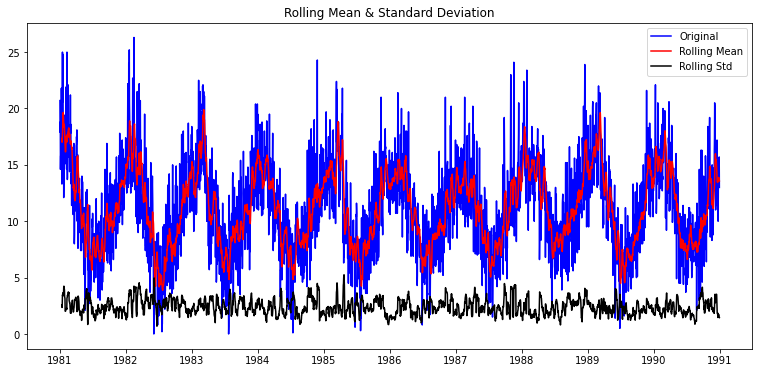

In [9]:
plot_rolling_statistics(ts1, window=12)

# 1-2. 시계열 데이터 사례분석2 : International airline passengers
월별 항공 승객 수(천명 단위)의 시계열 데이터 
- 기온 변화 데이터셋과는 패턴이 좀 다르지 않을까?

In [10]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


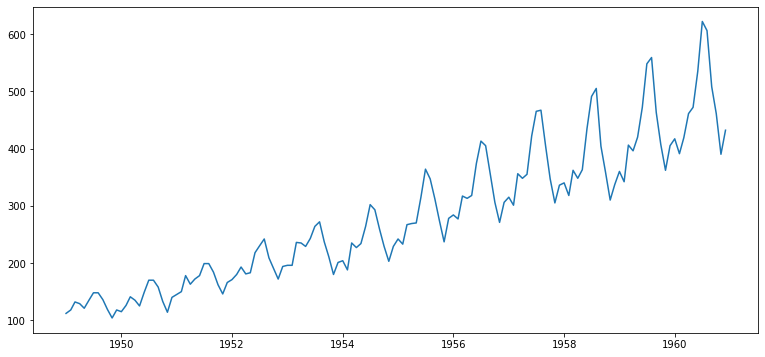

In [11]:
ts2 = df['Passengers']
plt.plot(ts2)

시간의 추이에 따라 시계열의 평균과 분산이 지속적으로 커지는 패턴이 보인다-?? 11-3설명읽고 다시보자.

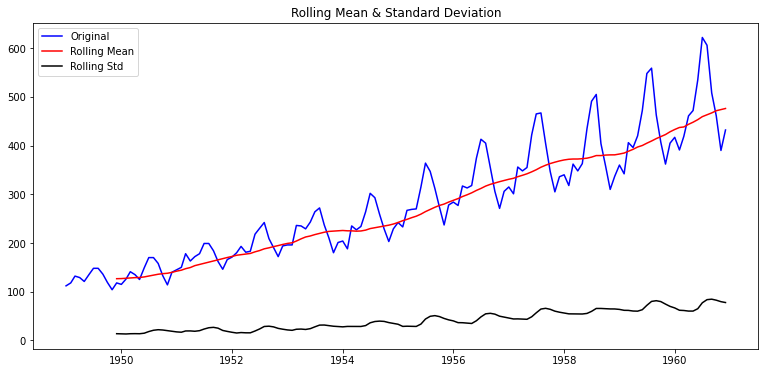

In [12]:
# 일정 시간 내 구간 통계치(Rolling Statistics)를 더해서 시각화
plot_rolling_statistics(ts2, window=12)

## (2) 시계열 안정성의 정성적 분석
시간의 추이에 따라
평균과 분산이 증가하는 패턴을 보임 
-> 이 시계열 데이터는
적어도 안정적이진 않다
=> 아래 <불안정적(Non-Stationary) 시계열 데이터에 대한 시계열 분석 기법> ㄱㄱ

# 1-3. [정리] 시계열 데이터를 다루는 기본적인 접근법
시계열 데이터의 안정성을
시각화 방법을 통해
**정성적**으로 분석하기

# 2-1. Stationary 여부를 체크하는 통계적 방법
**정량적**으로 분석하기

## Augmented Dickey-Fuller Test(ADF Test)
시계열 데이터의 안정성(stationary)을 테스트하는 통계적 방법.

1. "주어진 시계열 데이터가 안정적이지 않다"고 가정 - 귀무가설
2. 통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우
3. 이 시계열 데이터가 안정적이다라는 대립가설(Alternative Hypothesis)을 채택

ADF Test의 세부 알고리즘을 간단히 보고😉, 
statsmodels 패키지에서 제공하는 adfuller 메서드를 이용해 
손쉽게 ADF Test의 결과를 이용하자.

### p-value
귀무가설을 가정했을 때의 확률분포 상에서
현재의 관측보다 더 극단적인 관측이 나올 확률로서, 
귀무가설의 가정이 틀렸다고 볼 수 있는 확률이기도 하다. 
이 값이 0.05 미만으로 매우 낮게 나온다면
p-value만큼의 오류 가능성 하에 귀무가설을 기각하고
대립가설을 채택할 수 있는 근거가 된다.

[참고] 유의확률 .... https://ko.wikipedia.org/wiki/%EC%9C%A0%EC%9D%98_%ED%99%95%EB%A5%A0
[참고] 가설, 검정, p-value .... https://yeomko.tistory.com/37

### statsmodels 패키지와 adfuller 메서드
R에서 제공하는 통계검정, 시계열분석 등의 기능을 파이썬에서도 이용할 수 있도록 하는 강력한 통계 패키지

In [13]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다. - 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


In [14]:
# 정성적으로 분석해 보았던 두 시계열(Time Series)에 대해 Augmented Dickey-Fuller Test를 수행
augmented_dickey_fuller_test(ts1)    # ts1(Daily Minimum Temperatures in Melbourne)시계열

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


[결과] p-value가 거의 0에 가깝게 나타남.
따라서 이 귀무가설은 기각되고, 
이 시계열은 안정적 시계열이라는 대립가설이 채택.

In [15]:
augmented_dickey_fuller_test(ts2)    # ts2(International airline passengers)시계열

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


[결과] p-value가 너무 높다!
안정적이라고 할 수가 없게 되었다.

# 2-2. 시계열 예측의 기본 아이디어 : Stationary하게 만들 방법은 없을까?
안정적이라고 말할 수 없게 된 International airline passengers 시계열을 분석하려면 이것을 안정적인 시계열로 바꾸어 내야 합니다. 
어떻게?
1. 정성적인 분석을 통해 보다 안정적(starionary)인 특성을 가지도록 기존의 시계열 데이터를 가공/변형하는 시도
2. 시계열 분해(Time series decomposition) 기법을 적용

## (1) 보다 Stationary한 시계열로 가공해 가기
### 1-1. 로그함수 변환
가장 먼저 고려해 볼 수 있는 것은 시간 추이에 따라 분산이 점점 커지고 있다는 점
-> 시계열이 이런 특성을 보일 경우에는 로그함수로 변환을 해주는 것이 도움이 됨

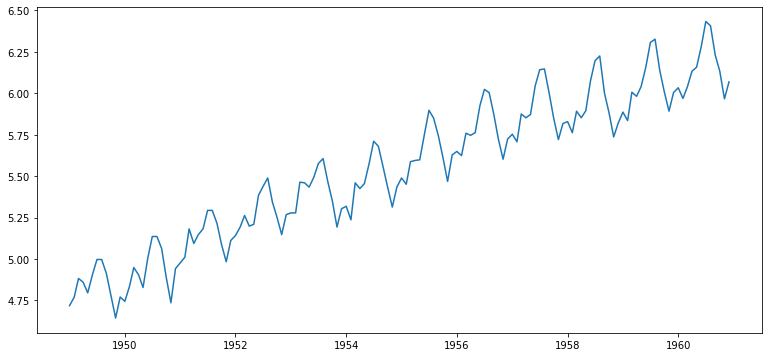

In [16]:
ts_log = np.log(ts2)
plt.plot(ts_log)

In [17]:
# 로그 변환의 효과를 따져보고자, ADF Test수행
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


[결과] 
p-value가 0.42로 무려 절반 이상 줄어듦
정성적으로도 시간 추이에 따른 분산이 일정해진 것을 확인할 수 있음.
=> 효과적인 변환!
하지만 아직 not enough,
가장 두드러지는 문제점은 시간 추이에 따라 평균이 계속 증가한다는 점

### 1-2. Moving average 제거 - 추세(Trend) 상쇄하기
* 추세(trend) - 시계열 분석에서 위와 같이 '시간 추이에 따라 나타나는 평균값 변화'
이 변화량을 제거해 주자! 
어떻게? 
이동평균을 빼서.
그러니까 거꾸로 Moving Average, 즉 rolling mean을 구해서 ts_log에서 빼주기

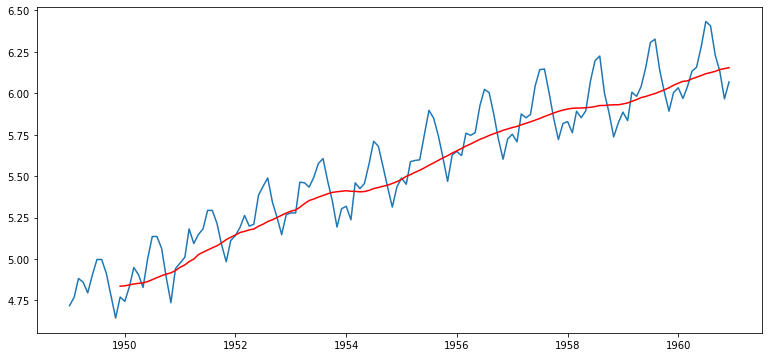

In [18]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [19]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

In [20]:
# 여기까지만 하면 ts_log_moving_avg에 거의 다왔지만,
# ts_log_moving_avg에 발생하는 결측치 제거를 먼저 해주어야 한다.
# 왜1? MovingAverage계산 시 (windows size=12인 경우) 앞의 11개 데이터는 Moving Average가 계산되지 않음
# 왜2? 향후 Dicky-Fuller Test에서 에러를 발생시킬 수 있음
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

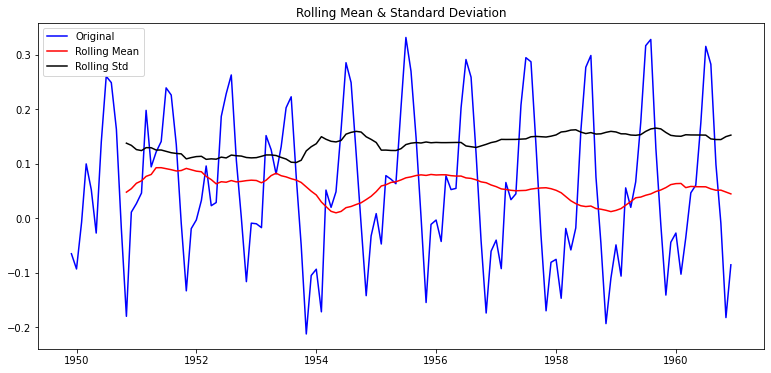

In [21]:
# 이제 ts_log_moving_avg를 정성, 정량적으로 분석해보자! 
plot_rolling_statistics(ts_log_moving_avg)

In [22]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


[결과] p-value 0.02로 이 time series는 stationary!
/ 이러한 접근의 문제 - Moving Average를 계산하는 window=12로 정확하게 지정해주어야 함

In [23]:
# window=6이었다면...
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
print('슝=3')

슝=3


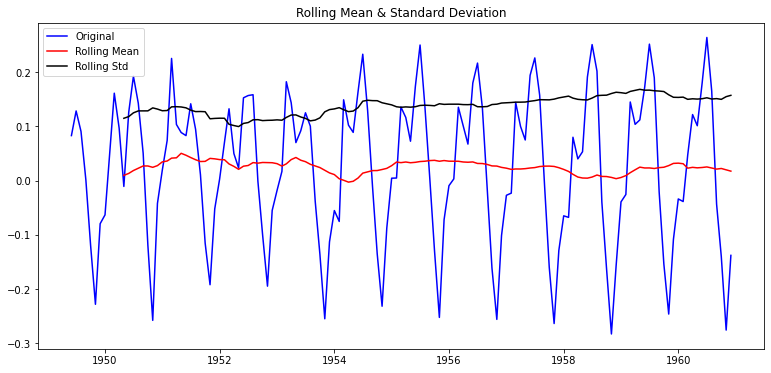

In [24]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [25]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


[결과] p-value 0.18로 안정적 시계열이라 말할 수 없게 됨
=> moving average를 고려할 때는 rolling mean을 구하기 위한 window크기를 결정하는 것이 매우 중요함!

### 1-3. 차분(Differencing) - 계절성(Seasonality) 상쇄하기

계절성? 패턴이 파악되지 않은 주기적 변화
- Trend에는 잡히지 않지만 시계열 데이터 안에 포함된
- 예측에 방해가 되는 불안정성 요소
- Moving Average제거로는 상쇄되지 않는 이러한 계절적, 주기적 패턴을 계절성이라 함

[참고] 시계열 패턴 .... https://otexts.com/fppkr/tspatterns.html

차분(Differencing)? 
시계열을 한 스텝 앞으로 시프트한 시계열을 
원래 시계열에 빼 줌
=> 남은 것은 
현재 스텝 값 - 직전 스텝 값이 되어 
정확히 이번 스텝에서 발생한 변화량을 의미

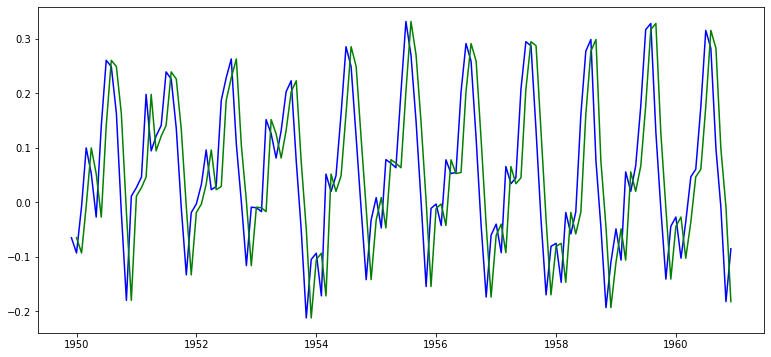

In [26]:
# 시프트한 시계열과 원본 시계열에 대한 그래프 그리기
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

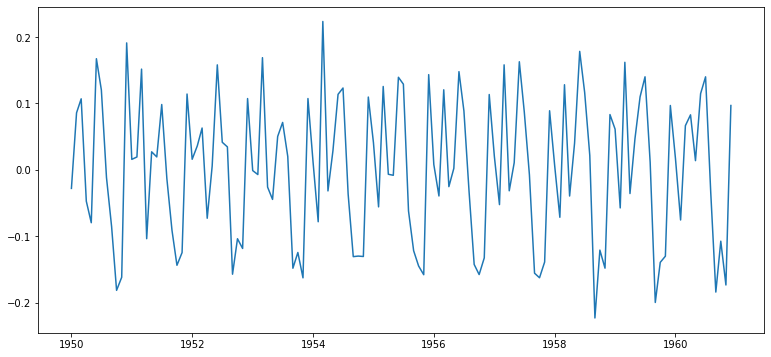

In [27]:
# 원본 시계열에서 시프트한 시계열을 뺀 값을 그래프로 그리기
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

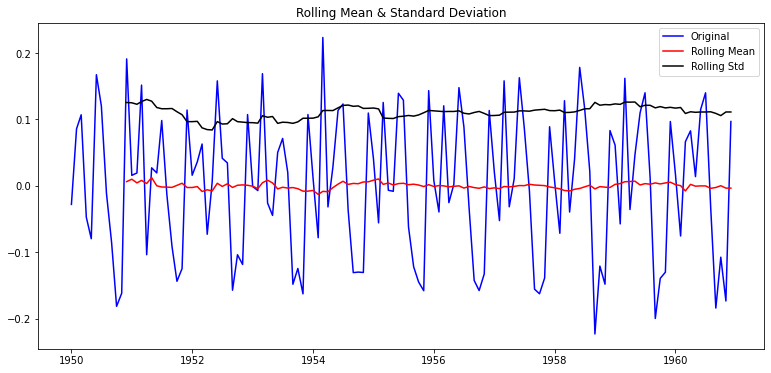

In [28]:
# 이동평균, 이동표준편차를 그래프에 나타내어 
# 정성적으로 안정성(stationary) 여부를 파악
plot_rolling_statistics(ts_log_moving_avg_diff)

In [29]:
# 차분의 효과를 확인하고자 ADF test를 수행
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


[결과]
이동평균을 빼 추세(Trend)를 제거하고 난 시계열에다가
1차 차분(1st order differencing)을 적용하여
Seasonality효과를 상쇄한 결과,
p-value가 약 1/10로 줆

데이터에 따라서
2차 차분(차분의 차분), 3차 차분을 적용하면
p-value를 더 낮출 수 있기도 함.

## (2) 시계열 분해(Time series decomposition)
statsmodels 라이브러리 안 seasonal_decompose 메서드
-> 시계열 안에 존재하는 trend, seasonality를 직접 분리해내는 기능
-> 직접 moving average 제거, differencing 해주지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있음!


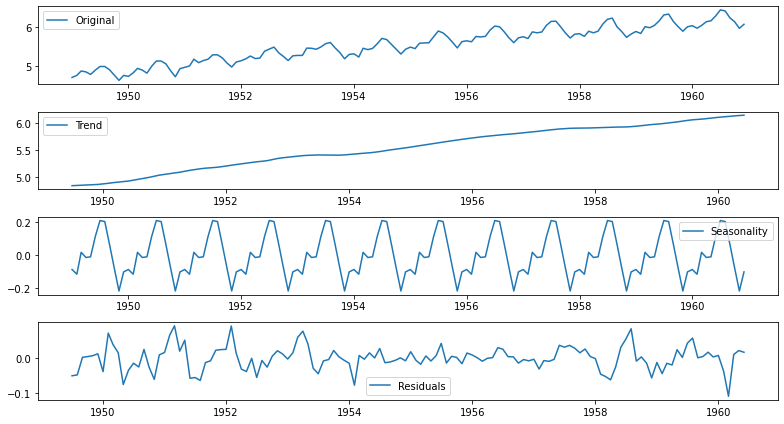

In [30]:
# 위에서 구현했던 로그 변환 단계(ts_log)부터 출발해보자.
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

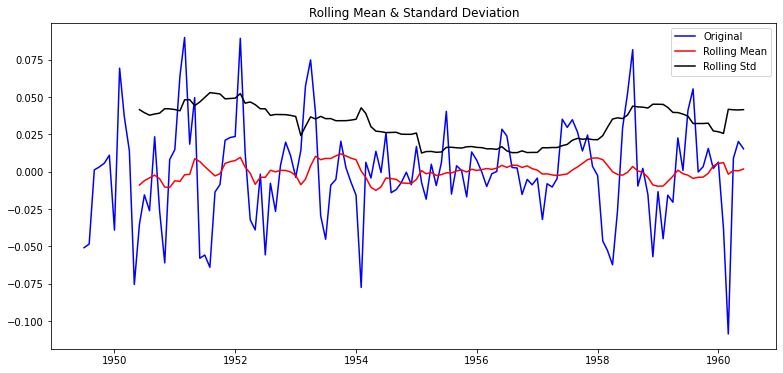

In [31]:
# Residual - Original 시계열에서 Trend와 Seasonality를 제거하고 난 나머지
# Trend + Seasonality + Residual = Original <-- 이것이 Decomposing!
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)    # Residual에 대해 안정성 여부 따져보기

In [32]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


[결론] 
p-value 훌륭쓰!
Trend와 Seasonality를 잘 분리해내니 Residual이
예측력을 지닌 안정적인 시계열 데이터가 되는구나!

# 3-1. 모델 훈련 ft. ARIMA
Autoregressive + Integrated + Moving Average 모델을 모두 한꺼번에 고려하여
시계열 데이터 예측 모델 자동으로 만들기

## (1) AR(자기회귀, Autoregressive)
* 과거 값들에 대한 회귀로 미래 값을 예측하는 방법
* p : ARIMA의 파라미터(모수), 자기회귀 모형의 시차

## (2) MA(이동평균, Moving Average)
* 주식값이 최근의 증감 패턴을 지속할 것이라고 보는 관점이 MA로 모델링하는 관점
* q : ARIMA의 파라미터(모수), 이동평균 모형의 시차

## (3) I(차분누적, Intergration)
* Seosonality에 해당하는 부분
* d : ARIMA의 파라미터(모수), 차분 누적 횟수

## (4) p, q, d
* 일반적으로 사용하는 p와 q?
p + q < 2, p * q = 0인 값
-> p나 q 중 하나는 0라는 뜻
왜? 많은 시계열 데이터가 AR이나 MA 중 하나의 경향만 가지기 때문
* p, d, q를 적정하게 선택하는 방법?
- ACF(Autocorrelation Function) : 시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수
- PACF(Partial Autocorrelation Function) : 다른 관측치의 영향력을 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수

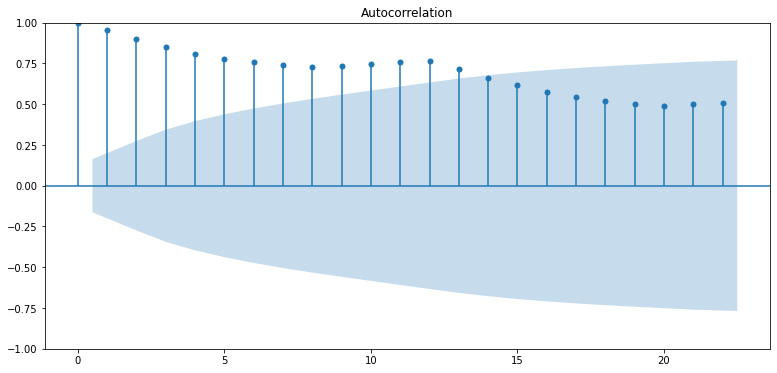

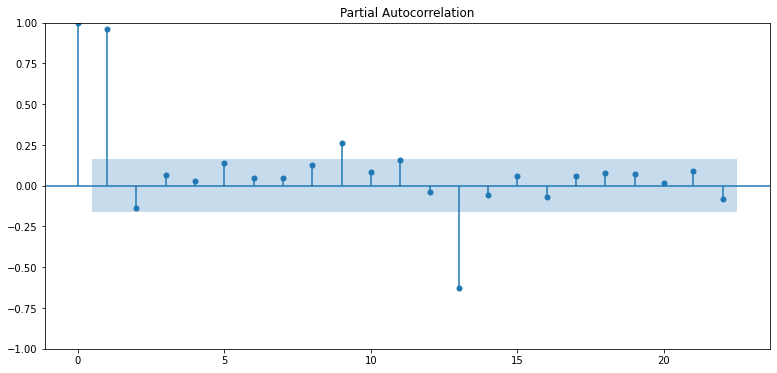

In [33]:
# statsmodels에서 제공하는 ACF와 PACF 플로팅 기능 사용
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

[결론]
i. PACF 그래프를 볼 떄 p = 1이 매우 적합한 것으로 보임
왜? p가 2 이상인 구간에서 PACF는 거의 0에 가까워지고 있기 때문
PACF가 0이라는 의미는 현재 데이터와 p 시점 떨어진 이전의 데이터는 상관도가 0,
즉 아무 상관없는 데이터이므로 고려할 필요가 없다는 뜻
ii. ACF는 점차적으로 감소하고 있어서 AR(1)모델에 유사한 형태를 보임
q에 대해서는 적합한 값이 없어 보임.
MA를 고려할 필요가 없다면 q = 0으로 둘 수 있음(하지만 q를 바꿔가면서 확인해보는 것도 좋음)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


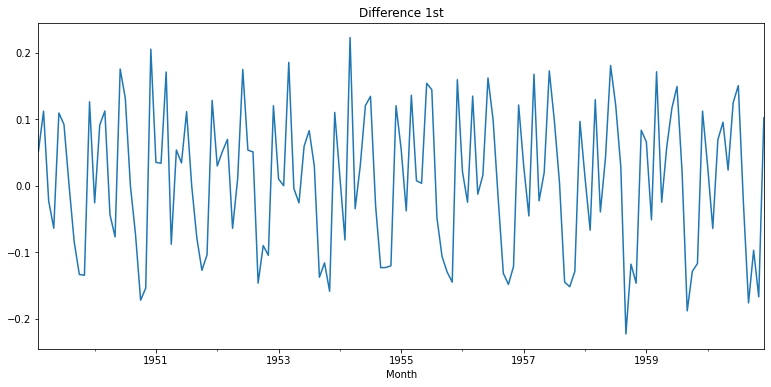

In [34]:
# d를 구하기 위해서는 d차 차분을 구해 보고 이 때 시계열이 안정된 상태인지 확인해 보아야 함.
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


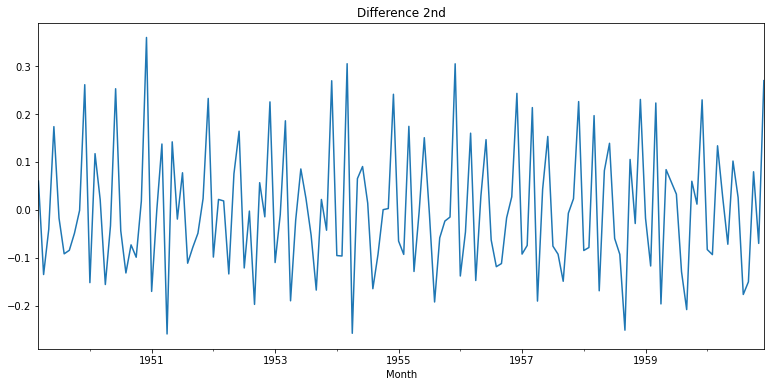

In [35]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

# 3-2. 학습 데이터 분리

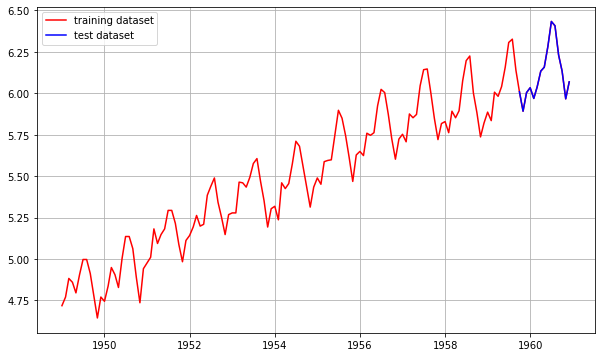

In [36]:
# 시계열 데이터에서 학습 데이터와 테스트 데이터를 분리 
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]    # 분리 비율은 학습과 테스트에 9:1
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')    # 시계열 예측인만큼 가장 나중 데이터를 테스트용으로 사용하는 것이 타당할 것임
plt.legend()

In [37]:
# 데이터셋 형태 확인
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


# 3-3. ARIMA 모델 훈련과 추론

In [38]:
# 쏘 간단한 ARIMA 모델 훈련
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                ARIMA(14, 1, 0)   Log Likelihood                 219.951
Date:                Thu, 17 Feb 2022   AIC                           -409.902
Time:                        14:15:43   BIC                           -367.121
Sample:                    01-01-1949   HQIC                          -392.520
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2752      0.081     -3.387      0.001      -0.434      -0.116
ar.L2         -0.0124      0.109     -0.114      0.909      -0.225       0.200
ar.L3          0.0002      0.046      0.005      0.9

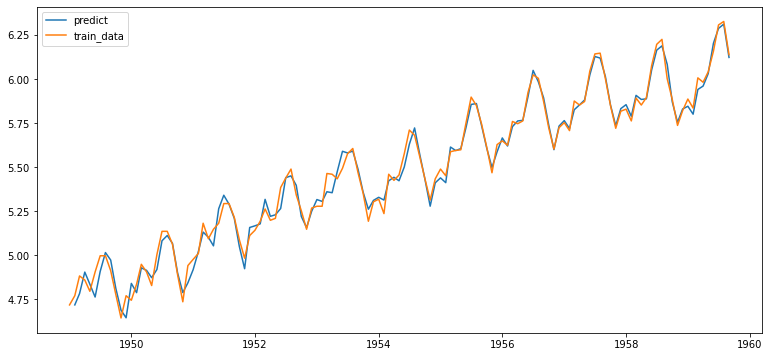

In [39]:
# ARIMA 모델이 훈련한 결과를 시각적으로 확인해보자.
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

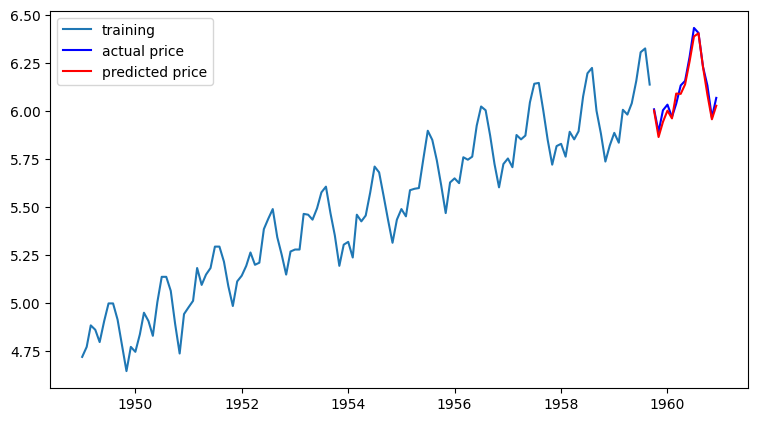

In [40]:
# forecast() 메소드 - 테스트 데이터 구간의 데이터를 예측

model = ARIMA(train_data, order=(14, 1, 0))  # p값을 14으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [41]:
# 정확한 오차 계산하기 -
# 시계열 데이터를 로그 변환해서 썼으므로
# 다시 지수 변환해야

# np.exp() - 전부 원본 스케일로 돌린 후
# MSE, MAE, RMSE, MAPE 계산

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  231.97320956929948
MAE:  12.424959605677085
RMSE:  15.230666747365314
MAPE: 2.74%


[결과]
예측 모델의 메트릭으로 활용하기에 적당한 MAPE 기준으로 10% 정도의 오차율을 보임
조금 더 다양한 테스트를 통해 더 적당한 모수를 찾아 최적화된 모델을 만들어보자.
ex) p = 14를 줄 경우 MAPE가 2% 정도로 내려감.

# 4-1. 프로젝트1

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# 시계열 데이터 준비 - Time Series 생성
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']


ts.head()

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

In [43]:
# 각종 전처리 수행 - 결측치 처리, 로그 변환
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.
ts_log = np.log(ts)

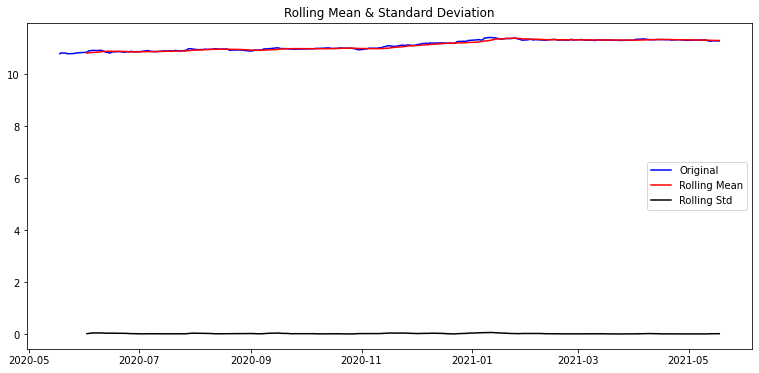

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


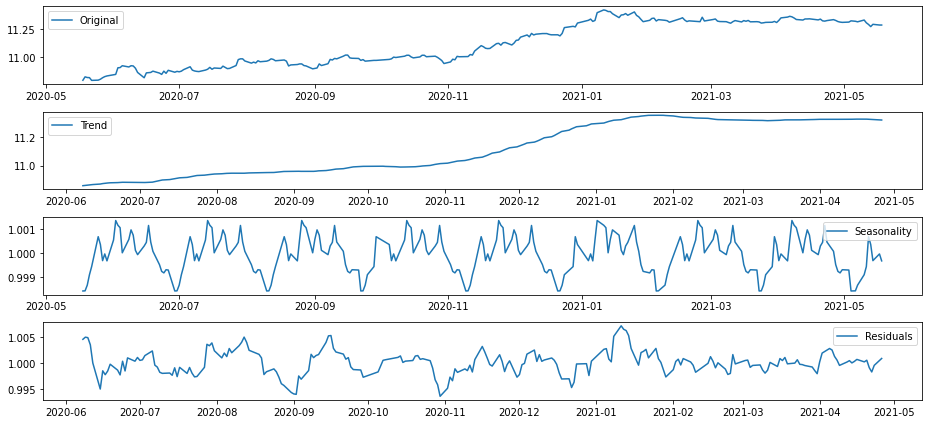

In [44]:
# 시계열 안정성 분석
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

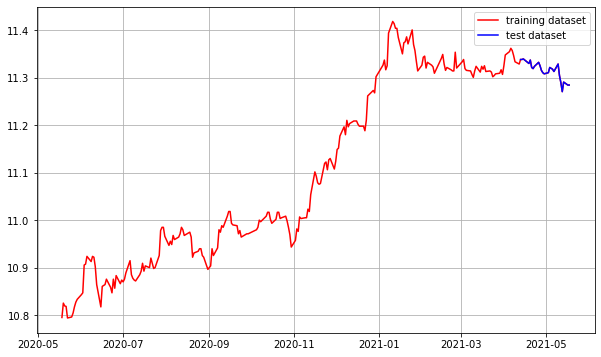

In [45]:
# 학습, 테스트 데이터셋 분리

train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

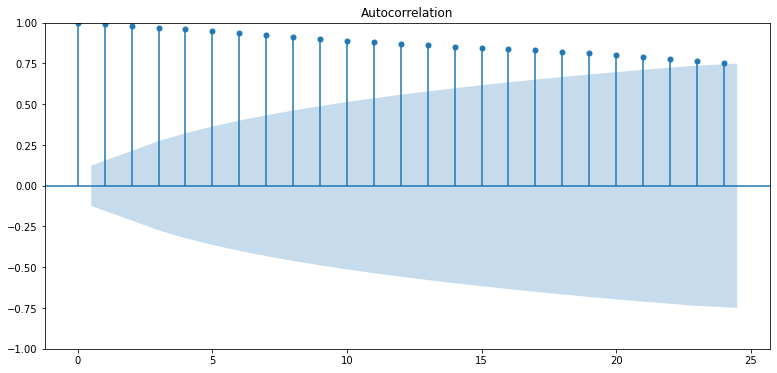

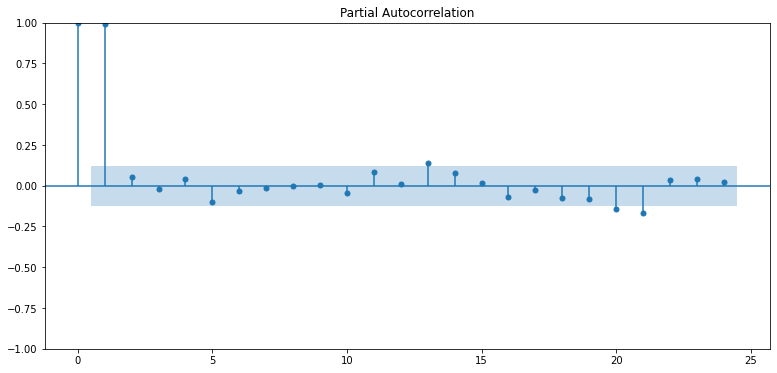

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


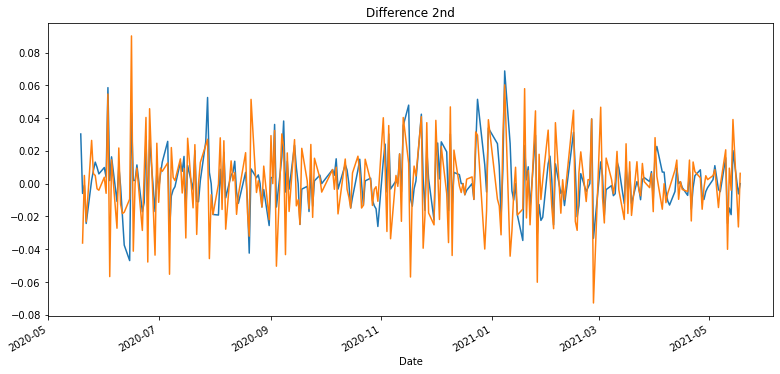

In [46]:
# 적정 ARIMA 모수 찾기


# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()


# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 583.361
Date:                Thu, 17 Feb 2022   AIC                          -1156.722
Time:                        14:15:48   BIC                          -1139.642
Sample:                             0   HQIC                         -1149.828
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.129     86.277      0.000      10.838      11.342
ar.L1          0.7739      1.821      0.425      0.671      -2.796       4.344
ar.L2          0.2191      1.811      0.121      0.9

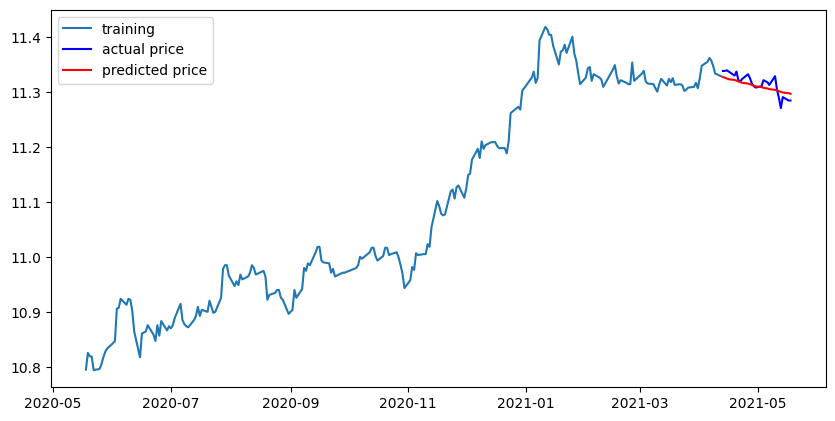

In [47]:
# ARIMA 모델 훈련과 테스트

from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1048973.6014239907
MAE:  843.7579531508708
RMSE:  1024.19412292006
MAPE: 1.03%


# 4-2. 다른 주식 종목 예측해 보기 - 종목2 : 어도비 시스템즈(ADBE)
관심 종목을 골라 위 STEP 1~6의 과정을 반복

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# 시계열 데이터 준비 - Time Series 생성
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/ADBE.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']


ts.head()

Date
2021-02-17    491.230011
2021-02-18    488.369995
2021-02-19    479.119995
2021-02-22    467.329987
2021-02-23    467.799988
Name: Close, dtype: float64

In [50]:
# 각종 전처리 수행 - 결측치 처리, 로그 변환
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.
ts_log = np.log(ts)

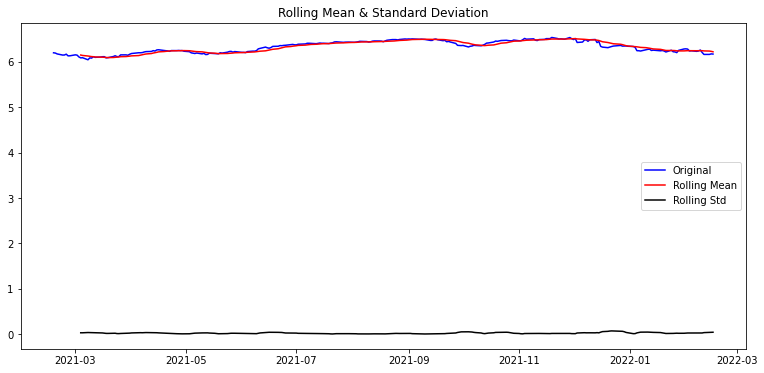

Results of Dickey-Fuller Test:
Test Statistic                  -1.121910
p-value                          0.706256
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -4.826529
p-value                          0.000048
#Lags Used                       0.000000
Number of Observations Used    223.000000
Critical Value (1%)             -3.460019
Critical Value (5%)             -2.874590
Critical Value (10%)            -2.573725
dtype: float64


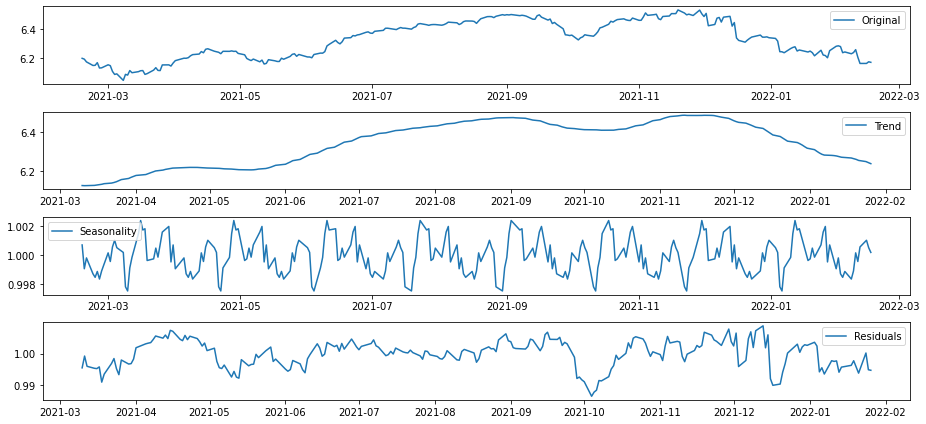

In [51]:
# 시계열 안정성 분석
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

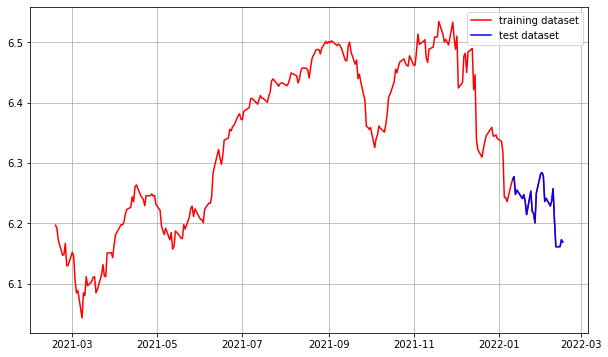

In [52]:
# 학습, 테스트 데이터셋 분리

train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

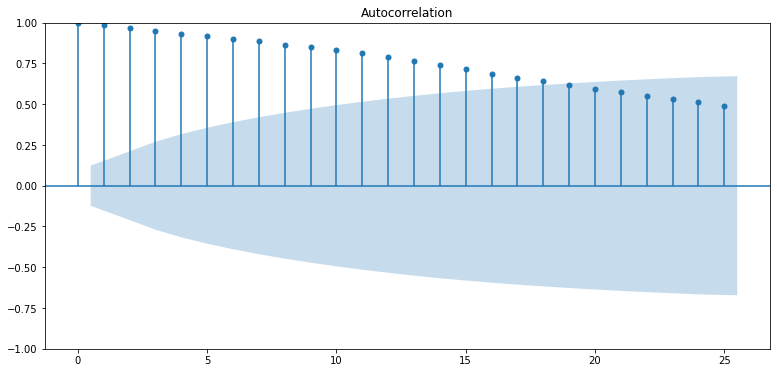

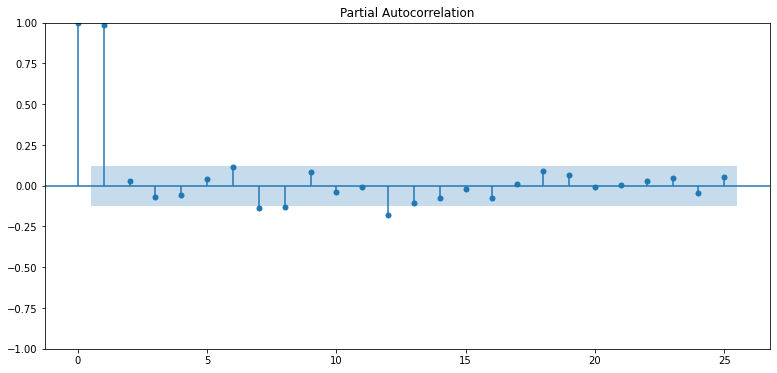

Results of Dickey-Fuller Test:
Test Statistic                -1.654504e+01
p-value                        1.968126e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64


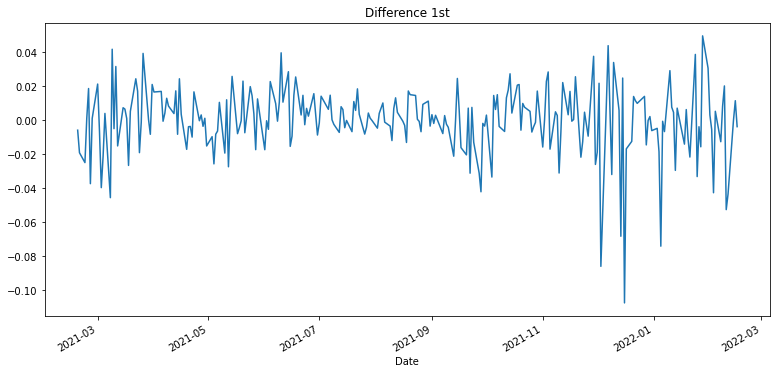

In [53]:
# 적정 ARIMA 모수 찾기


# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()


# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 574.712
Date:                Thu, 17 Feb 2022   AIC                          -1139.424
Time:                        14:15:50   BIC                          -1122.278
Sample:                             0   HQIC                         -1132.506
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2931      0.102     61.610      0.000       6.093       6.493
ar.L1          0.0756      0.815      0.093      0.926      -1.523       1.674
ar.L2          0.9016      0.801      1.125      0.2

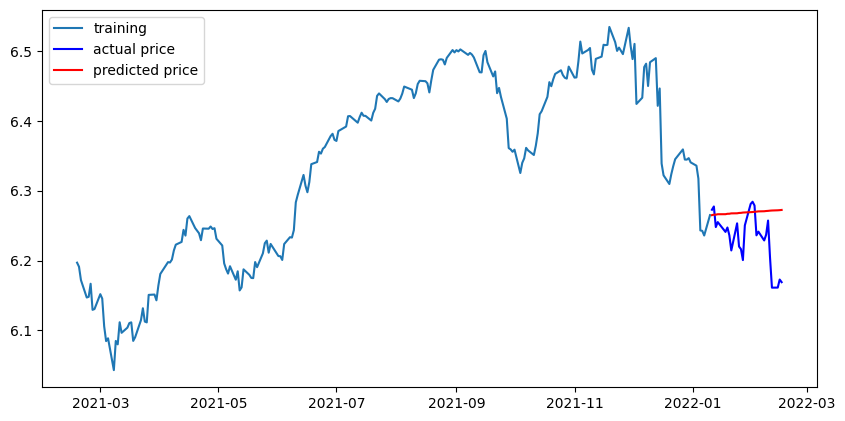

In [54]:
# ARIMA 모델 훈련과 테스트

from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  697.948980533909
MAE:  20.7938303186221
RMSE:  26.41872405196566
MAPE: 4.20%


#  4-3. 다른 주식 종목 예측해 보기 - 종목3 :  Tencent Holdings Ltd

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# 시계열 데이터 준비 - Time Series 생성
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/TCEHY.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']


ts.head()

Date
2021-02-17    97.309998
2021-02-18    95.739998
2021-02-19    95.500000
2021-02-22    90.290001
2021-02-23    90.730003
Name: Close, dtype: float64

In [57]:
# 각종 전처리 수행 - 결측치 처리, 로그 변환
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.
ts_log = np.log(ts)

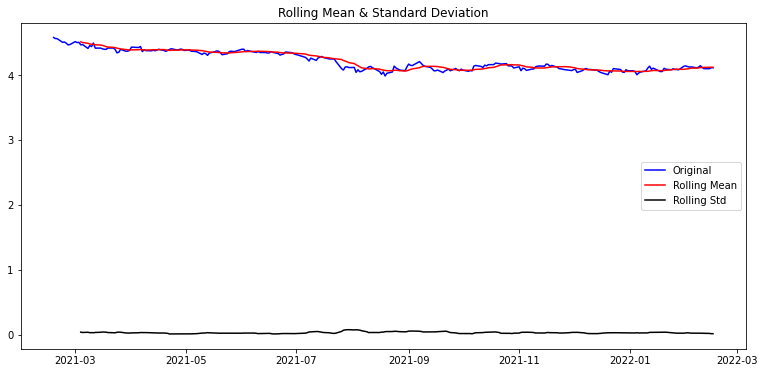

Results of Dickey-Fuller Test:
Test Statistic                  -2.323834
p-value                          0.164396
#Lags Used                       1.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.264239e+00
p-value                        4.151449e-08
#Lags Used                     2.000000e+00
Number of Observations Used    2.210000e+02
Critical Value (1%)           -3.460291e+00
Critical Value (5%)           -2.874709e+00
Critical Value (10%)          -2.573789e+00
dtype: float64


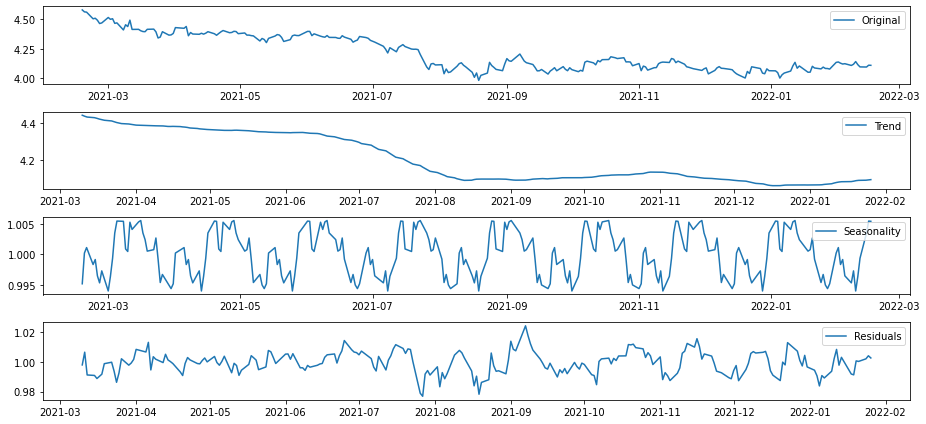

In [58]:
# 시계열 안정성 분석
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

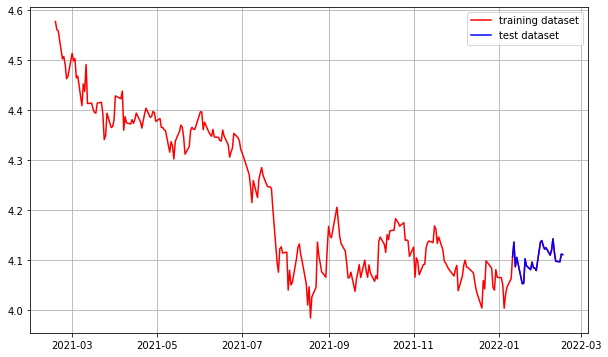

In [59]:
# 학습, 테스트 데이터셋 분리

train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

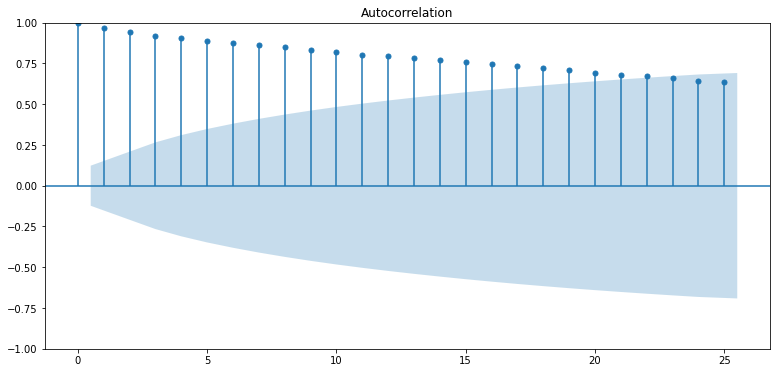

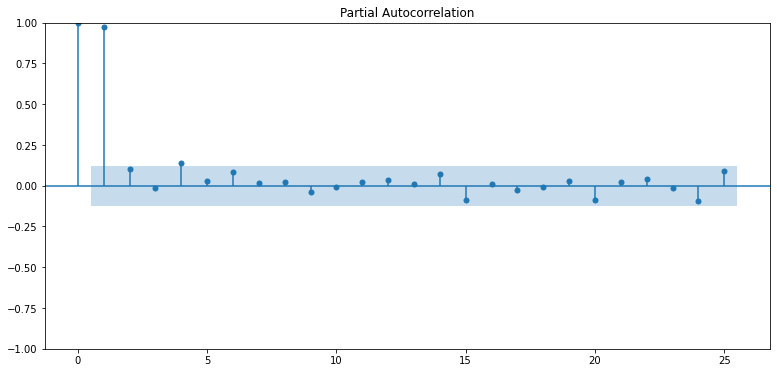

Results of Dickey-Fuller Test:
Test Statistic                -1.852480e+01
p-value                        2.106567e-30
#Lags Used                     0.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64


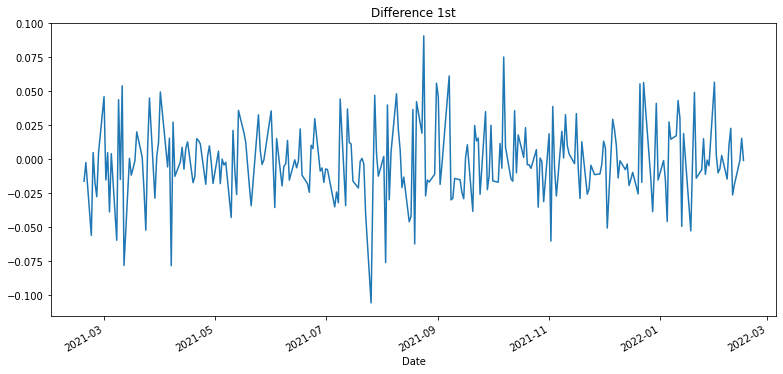

In [60]:
# 적정 ARIMA 모수 찾기


# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()


# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 495.602
Date:                Thu, 17 Feb 2022   AIC                           -981.205
Time:                        14:15:52   BIC                           -964.058
Sample:                             0   HQIC                          -974.287
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2825      0.164     26.058      0.000       3.960       4.605
ar.L1          0.2798      0.222      1.262      0.207      -0.155       0.714
ar.L2          0.7105      0.221      3.214      0.0

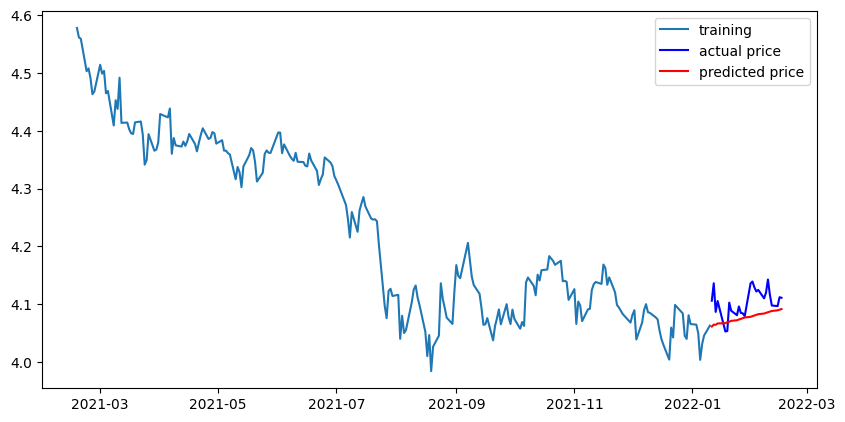

In [61]:
# ARIMA 모델 훈련과 테스트

from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  4.400629352207806
MAE:  1.7669532205779623
RMSE:  2.09776770692272
MAPE: 2.88%


#  4-3. 다른 주식 종목 예측해 보기 - 종목4 : 월트 디즈니 컴퍼니(DIS)

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# 시계열 데이터 준비 - Time Series 생성
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/DIS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']


ts.head()

Date
2021-02-17    186.440002
2021-02-18    183.000000
2021-02-19    183.649994
2021-02-22    191.759995
2021-02-23    197.089996
Name: Close, dtype: float64

In [64]:
# 각종 전처리 수행 - 결측치 처리, 로그 변환
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.
ts_log = np.log(ts)

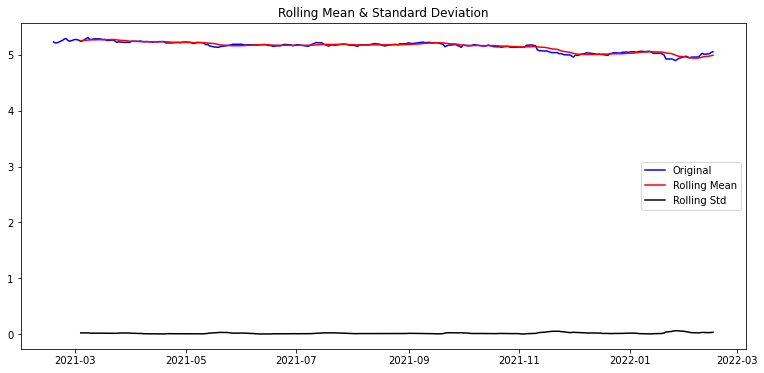

Results of Dickey-Fuller Test:
Test Statistic                  -1.408384
p-value                          0.578250
#Lags Used                       1.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -5.217698
p-value                          0.000008
#Lags Used                       4.000000
Number of Observations Used    219.000000
Critical Value (1%)             -3.460567
Critical Value (5%)             -2.874830
Critical Value (10%)            -2.573853
dtype: float64


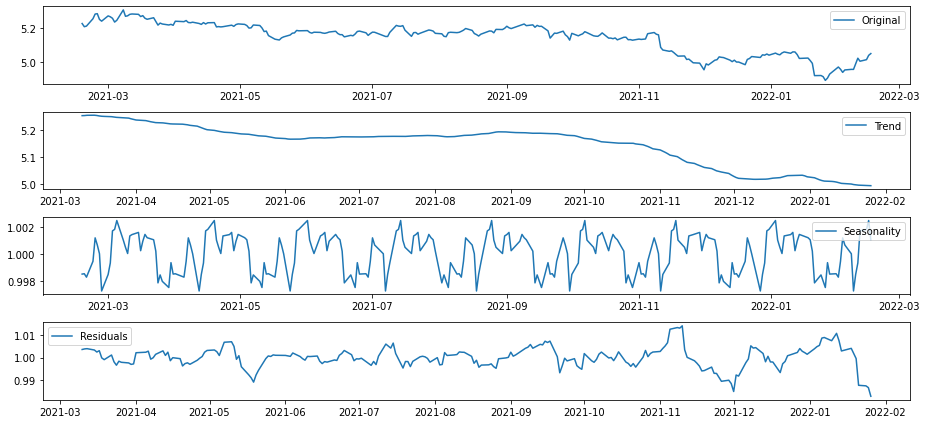

In [65]:
# 시계열 안정성 분석
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

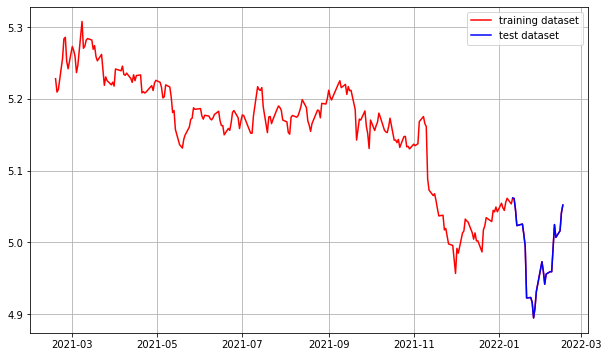

In [66]:
# 학습, 테스트 데이터셋 분리

train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

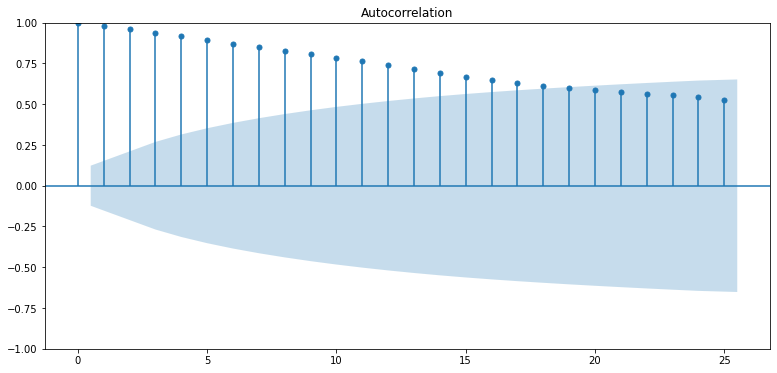

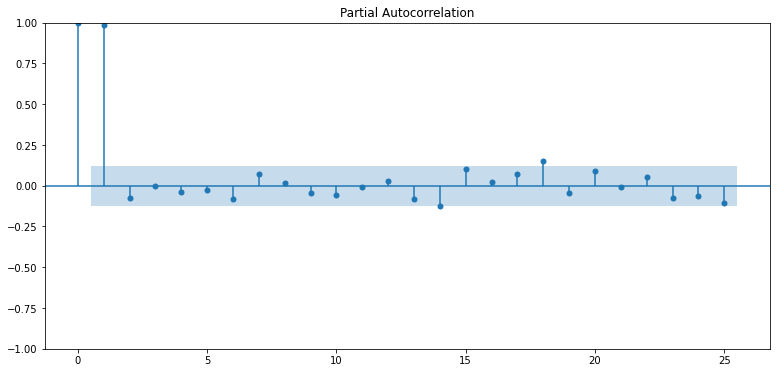

Results of Dickey-Fuller Test:
Test Statistic                -1.480968e+01
p-value                        2.039490e-27
#Lags Used                     0.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.450467e+00
p-value                        1.667755e-13
#Lags Used                     1.000000e+01
Number of Observations Used    2.410000e+02
Critical Value (1%)           -3.457779e+00
Critical Value (5%)           -2.873609e+00
Critical Value (10%)          -2.573202e+00
dtype: float64


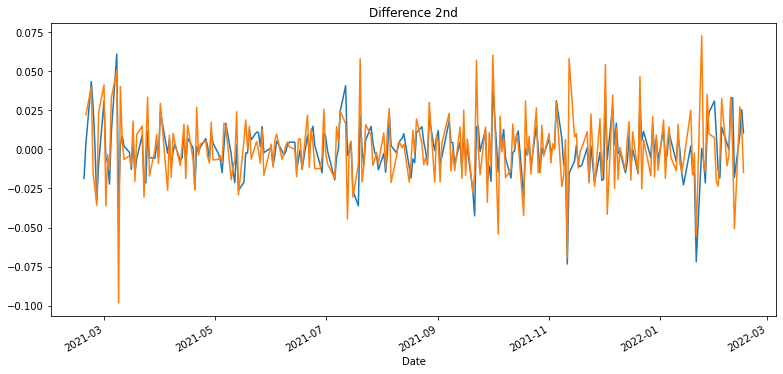

In [67]:
# 적정 ARIMA 모수 찾기


# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()


# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 634.602
Date:                Thu, 17 Feb 2022   AIC                          -1259.204
Time:                        14:15:54   BIC                          -1242.057
Sample:                             0   HQIC                         -1252.286
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1564      0.043    119.606      0.000       5.072       5.241
ar.L1          0.1683      0.797      0.211      0.833      -1.393       1.730
ar.L2          0.7957      0.794      1.002      0.3

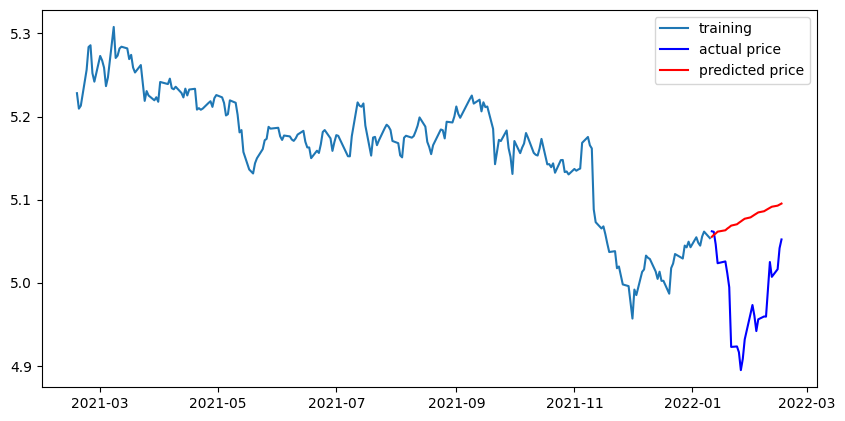

In [68]:
# ARIMA 모델 훈련과 테스트

from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  259.8275264558571
MAE:  14.267414132847792
RMSE:  16.11916643179346
MAPE: 10.04%


# 5. 회고

1. 시계열의 안정성이 충분히 확인되었는가? 
- 플로팅과 adfuller 메소드 모두 적절히 사용되

주어진 time series의 Stationary 여부를 정량적으로 분석하기 위해 ADF Test를 이용했다. ADF Test를 수행하기 위해서 구체적으로는 셀 13에서 augmented_dickey_fuller_test라는 이름으로 정의해둔 adfuller 메소드를 사용하였다.
또한 시계열의 안정성을 확보하기 위해 사용되는 시계열 분해의 (Trend + Seasonality + Residual = Original)와 비슷한 AR+I+MA(Autoregressive + Integrated + Moving Average)모델들을 모두 함께 고려해보았다. 이때, 시계열의 시차 값 사이의 선형 관계를 측정하는 Autocorrelation(자기상관) 그래프를 그리기 위해 statsmodels 패키지의 ACF와 PACF를 불러와 플로팅 기능을 활용하였다.

2. ARIMA 모델 모수선택 근거를 체계적으로 제시하였는가?
- p,q를 위한 ACF, PACF 사용과 d를 위한 차분 과정 명확히 제시

(1) AR(자기회귀)와 MA(이동평균) 각각의 파라미터에 해당되는 p와 q의 가장 적절한 값을 구하기 위해 ACF, PACF를 사용하였다. 
i) 종목2 :  ACF 그래프 -> 점차적으로 감소하고 있어서 AR(1)모델에 가까운 형태를 보임 -> MA를 고려할 필요가 없기 때문에 q = 0으로 둠.
PACF 그래프 -> p가 2 이상인 구간에서 PACF는 거의 0에 가까워지고 있기 때문에 p = 1이 적합할 것으로 보임 (PACF가 0이라는 의미는 현재 데이터와 p 시점 떨어진 이전의 데이터는 상관도가 0, 즉 아무 상관없는 데이터이므로 고려할 필요가 없다는 뜻) 
ii) 종목3, 4 역시 ACF는 점차 감소, PACF는 p가 3이상인 구간에서 0에 가까워지고 있으므로 AR모델과 유사하다고 보여짐. 마찬가지로 일반적으로 많은 시계열 데이터는 AR이나 MA중 하나의 경향만 가지므로 p 와 q 는 p + q < 2, p * q = 0 인 값(=> p 나 q 중 하나는 0)을 사용한다는 점을 참고하여, q = 0으로 설정


(2) d를 구하고자 차분을 구하였다. 이때, 세 종목(종목2, 종목3, 종목4) 모두 1차 훈련&테스트에서는 2차 차분까지 하였다. 그리고 p-value값은 아래와 같았다.

i) 종목2 (여담 : 종목1이라는 네이밍은 노드에 제시된 samsung에 달아두어, 종목2부터가 제가 선택한 종목입니다.)
p-value                        1.968126e-29    #1차 차분
p-value                        3.332183e-15    #2차 차분
ii) 종목3
p-value                        2.106567e-30    #1차 차분
p-value                        3.492226e-11    #2차 차분
iii) 종목4
p-value                        2.039490e-27    #1차 차분
p-value                        1.667755e-13    #2차 차분

종목4는 2차 차분까지 할 경우 p-value가 개선되었지만, 종목2와 3은 그렇지 않았기 때문에 2차 훈련&테스트에서는 1차 차분만 구해주었다.

3. 예측 모델의 오차율이 기준 이하로 정확하게 나왔는가?
- 3개 이상 종목이 MAPE 15% 미만의 정확도로 예측

(1) 종목2 : MAPE 4.20%
(2) 종목3 : MAPE 2.88%
(3) 종목4 : MAPE 10.04%